In [1]:
import pandas as pd
import numpy as np

In [8]:
# Load data
df = pd.read_csv(r"E:\Milan/time_series_dataset24.csv")
df

,PIN1,PTC,PDT1,PDT2,PGV1,PGV2,PGV3,PDT3,PDT4,Patm,...,FricTorque,Pin,Pdiff,GV,AGV,ATB1,ATB2,Group,Stage,Head
0,0.002862,0.001300,0.004675,0.004430,0.006501,0.005931,0.006195,0.020413,0.024108,6.285425,...,1.246962,6.118898,6.649683,2.636216,0.297385,-0.163528,0.224599,DPL,1,24
1,0.002862,0.001297,0.004674,0.004431,0.006519,0.005950,0.006197,0.020705,0.022757,6.291337,...,1.250575,6.142219,6.677930,2.635310,0.205243,-0.051941,0.307536,DPL,1,24
2,0.002862,0.001292,0.004673,0.004432,0.006524,0.005949,0.006208,0.021536,0.021985,6.287724,...,1.245649,6.096892,6.639173,2.634754,0.124694,-0.024502,0.252041,DPL,1,24
3,0.002863,0.001287,0.004673,0.004432,0.006537,0.005971,0.006211,0.021012,0.020271,6.283783,...,1.266670,6.125139,6.676617,2.634428,0.108219,-0.042185,0.274605,DPL,1,24
4,0.002865,0.001284,0.004673,0.004431,0.006531,0.005995,0.006229,0.019912,0.018715,6.288381,...,1.247619,6.032514,6.704535,2.634260,0.229651,-0.048283,0.203255,DPL,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13823995,0.002673,0.001582,0.004092,0.003841,0.007138,0.006577,0.006932,0.021125,-0.006264,6.318599,...,1.142187,5.881754,6.534067,4.384009,0.244296,0.208429,0.197766,FL,9,24
13823996,0.002672,0.001587,0.004089,0.003838,0.007111,0.006554,0.006877,0.022708,-0.005751,6.314329,...,1.134304,5.889965,6.556730,4.383941,0.122864,0.210258,0.222160,FL,9,24
13823997,0.002671,0.001589,0.004089,0.003834,0.007081,0.006527,0.006842,0.027942,-0.002138,6.316629,...,1.127078,5.876498,6.520928,4.383734,0.261382,0.145623,0.202035,FL,9,24
13823998,0.002670,0.001585,0.004087,0.003829,0.007069,0.006505,0.006827,0.026696,-0.002301,6.320242,...,1.135289,5.878797,6.571511,4.383563,0.193038,0.041963,0.208134,FL,9,24


In [9]:
df = df.drop(['PIN1', 'PTC', 'WTmp','Head','Patm','rpm','Speed','Flow','Thrust','GenTorque','FricTorque','FricTorque','Pin','Pdiff','GV','AGV','Group','PDT2','PGV1','PGV3','PDT4'], axis=1)
print(df)

              PDT1      PGV2      PDT3      ATB1      ATB2  Stage
0         0.004675  0.005931  0.020413 -0.163528  0.224599      1
1         0.004674  0.005950  0.020705 -0.051941  0.307536      1
2         0.004673  0.005949  0.021536 -0.024502  0.252041      1
3         0.004673  0.005971  0.021012 -0.042185  0.274605      1
4         0.004673  0.005995  0.019912 -0.048283  0.203255      1
...            ...       ...       ...       ...       ...    ...
13823995  0.004092  0.006577  0.021125  0.208429  0.197766      9
13823996  0.004089  0.006554  0.022708  0.210258  0.222160      9
13823997  0.004089  0.006527  0.027942  0.145623  0.202035      9
13823998  0.004087  0.006505  0.026696  0.041963  0.208134      9
13823999  0.004087  0.006499  0.024260  0.105378  0.202035      9

[13824000 rows x 6 columns]


In [10]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [11]:
# --- Load Full Dataset ---
features = ['PDT1', 'PGV2', 'PDT3', 'ATB1', 'ATB2']
X = df[features].values
y = df['Stage'].values

# --- Normalization ---
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# --- Shift Labels to 0-based ---
y = y - 1


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,                # input and target
    test_size=0.2,              # 20% for testing
    random_state=42,            # reproducibility
              
)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [14]:
model = Sequential([
    Dense(256, input_shape=(5,), activation='tanh'),
    BatchNormalization(),
    Dense(128, activation='tanh'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    layers.Dropout(0.2),
    Dense(32, activation='relu'),
    layers.Dropout(0.1),

    Dense(9, activation='softmax')  # 9 output classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # for integer labels
              metrics=['accuracy'])

model.summary()


C:\Users\TTL\anaconda3\envs\ai-env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 9)                   │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,601 (182.04 KB)

 Trainable params: 45,833 (179.04 KB)

 Non-trainable params: 768 (3.00 KB)

In [15]:
# Learning rate reduction + early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)


In [16]:
history = model.fit(
    X_train, y_train,
    epochs=100, # Increased epochs
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr] # Added callbacks
)

Epoch 1/100
172800/172800 ━━━━━━━━━━━━━━━━━━━━ 707s 4ms/step - accuracy: 0.2796 - loss: 1.8148 - val_accuracy: 0.3155 - val_loss: 1.7194 - learning_rate: 0.0010
Epoch 2/100
172800/172800 ━━━━━━━━━━━━━━━━━━━━ 711s 4ms/step - accuracy: 0.3063 - loss: 1.7463 - val_accuracy: 0.3171 - val_loss: 1.7142 - learning_rate: 0.0010
Epoch 3/100
172800/172800 ━━━━━━━━━━━━━━━━━━━━ 726s 4ms/step - accuracy: 0.3099 - loss: 1.7388 - val_accuracy: 0.3214 - val_loss: 1.7109 - learning_rate: 0.0010
Epoch 4/100
172800/172800 ━━━━━━━━━━━━━━━━━━━━ 713s 4ms/step - accuracy: 0.3116 - loss: 1.7345 - val_accuracy: 0.3210 - val_loss: 1.7110 - learning_rate: 0.0010
Epoch 5/100
172800/172800 ━━━━━━━━━━━━━━━━━━━━ 735s 4ms/step - accuracy: 0.3127 - loss: 1.7325 - val_accuracy: 0.3217 - val_loss: 1.7121 - learning_rate: 0.0010
Epoch 6/100
172800/172800 ━━━━━━━━━━━━━━━━━━━━ 729s 4ms/step - accuracy: 0.3135 - loss: 1.7312 - val_accuracy: 0.3220 - val_loss: 1.7100 - learning_rate: 0.0010
Epoch 7/100
172800/172800 ━━━━━━━━

In [18]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 4.2 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.1 MB 4.9 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 5.3 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.1 MB 4.8 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.1 MB 4.9 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 4.9 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 4.8 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------ --------------------- 1.0/2.2 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 5.8 MB

In [22]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


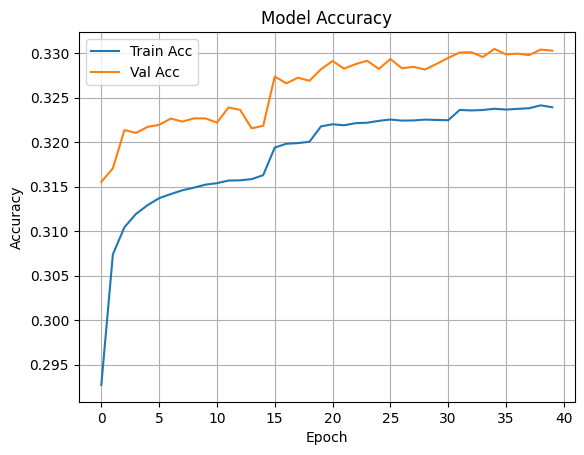

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


86400/86400 ━━━━━━━━━━━━━━━━━━━━ 303s 3ms/step


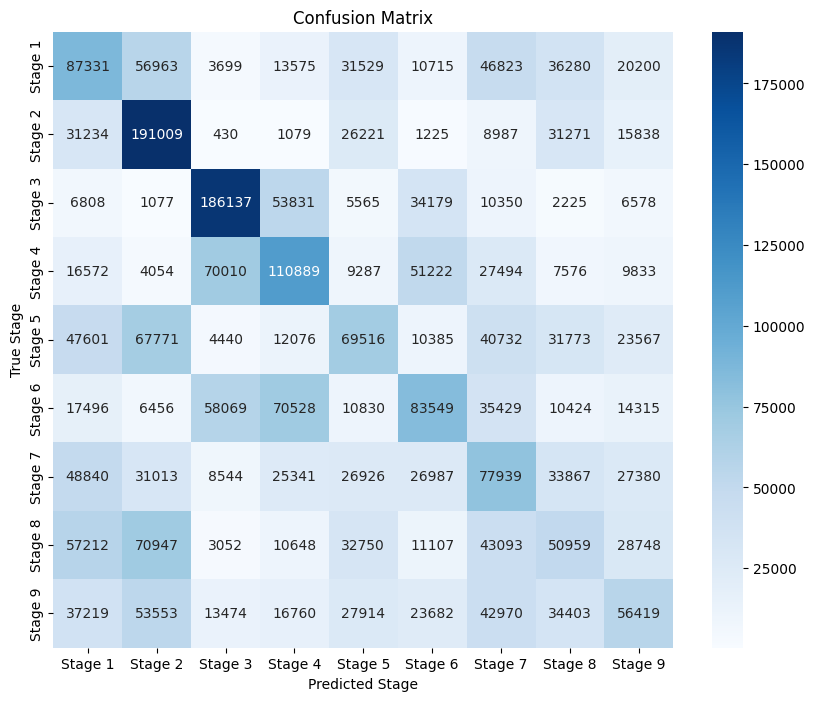

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Run predictions on your test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualize it as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Stage {i}' for i in range(1, 10)],
            yticklabels=[f'Stage {i}' for i in range(1, 10)])
plt.xlabel('Predicted Stage')
plt.ylabel('True Stage')
plt.title('Confusion Matrix')
plt.show()


In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_classes, target_names=[f'Stage {i}' for i in range(1, 10)]))


              precision    recall  f1-score   support

     Stage 1       0.25      0.28      0.27    307115
     Stage 2       0.40      0.62      0.48    307294
     Stage 3       0.54      0.61      0.57    306750
     Stage 4       0.35      0.36      0.36    306937
     Stage 5       0.29      0.23      0.25    307861
     Stage 6       0.33      0.27      0.30    307096
     Stage 7       0.23      0.25      0.24    306837
     Stage 8       0.21      0.17      0.19    308516
     Stage 9       0.28      0.18      0.22    306394

    accuracy                           0.33   2764800
   macro avg       0.32      0.33      0.32   2764800
weighted avg       0.32      0.33      0.32   2764800



In [26]:
# Save model in HDF5 format
model.save("ann_fault_model.h5")
